In [129]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.formula.api as smf
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,summarize,poly)
from scipy.stats import t
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [130]:
Auto = load_data('Auto')
print(Auto.columns)
Auto


Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin'],
      dtype='object')


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


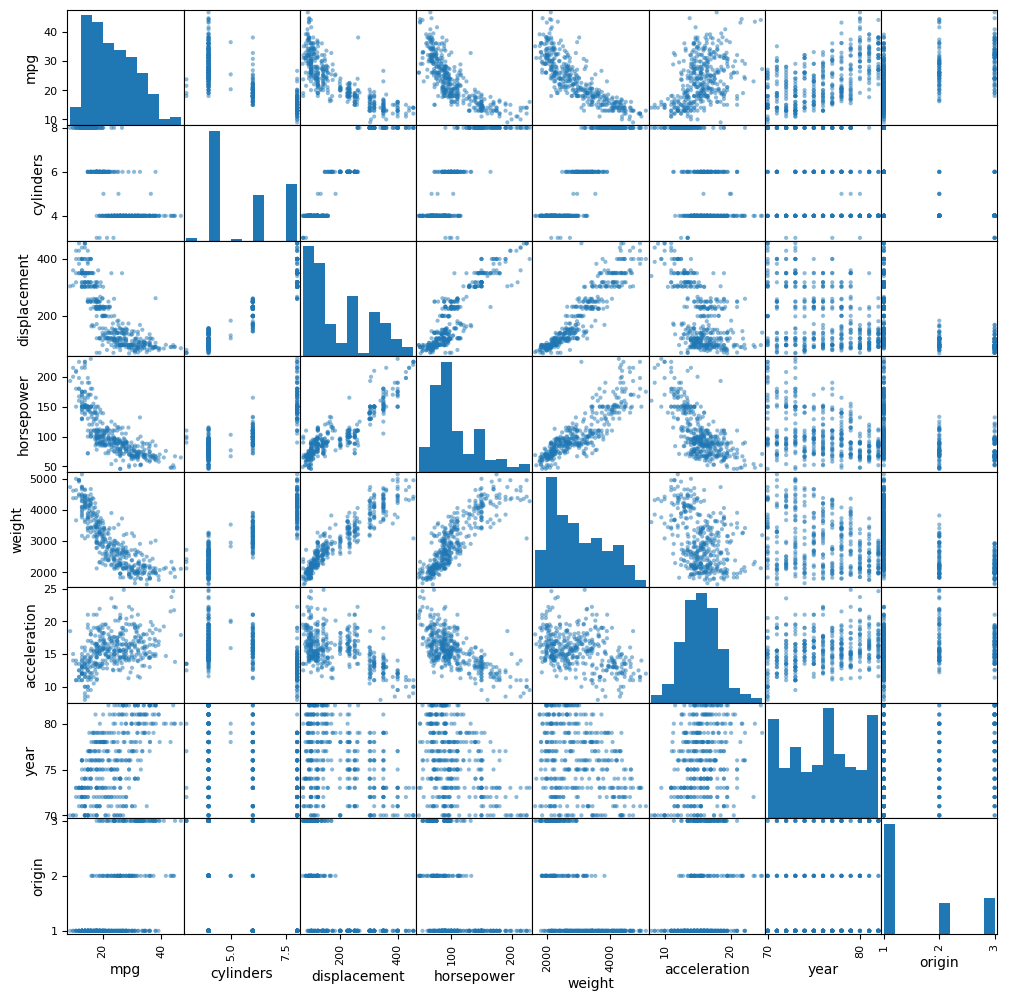

In [131]:
pd.plotting.scatter_matrix(Auto, figsize=(12,12));

In [132]:
Auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [133]:
y = Auto['mpg']
X = MS(Auto.columns.drop(['mpg'])).fit_transform(Auto)
model = sm.OLS(y, X)
results = model.fit()
print(summarize(results))
results.summary()

                 coef  std err       t  P>|t|
intercept    -17.2184    4.644  -3.707  0.000
cylinders     -0.4934    0.323  -1.526  0.128
displacement   0.0199    0.008   2.647  0.008
horsepower    -0.0170    0.014  -1.230  0.220
weight        -0.0065    0.001  -9.929  0.000
acceleration   0.0806    0.099   0.815  0.415
year           0.7508    0.051  14.729  0.000
origin         1.4261    0.278   5.127  0.000


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 09 Jul 2024   Prob (F-statistic):          2.04e-139
Time:                        09:02:52   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
intercept      -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [134]:
import statsmodels.formula.api as smf

results1 = smf.ols('y~X',data=Auto).fit()
anova_lm(results1)

,df,sum_sq,mean_sq,F,PR(>F)
X,8.0,19575.989106,2446.998638,220.978484,1.327873e-138
Residual,384.0,4252.212530,11.073470,NaN,NaN


Displacement, weight, year and origin appear to have a statistically significant relationship to the response

The coefficient of the year variable of 0.7508 suggests that with all other vairables held constant, a increase of 1 of one year will lead to an increase of 0.7508 mpg. This means that as time goes on mpg tends to get better.

In [135]:
results.params

intercept      -17.218435
cylinders       -0.493376
displacement     0.019896
horsepower      -0.016951
weight          -0.006474
acceleration     0.080576
year             0.750773
origin           1.426140
dtype: float64

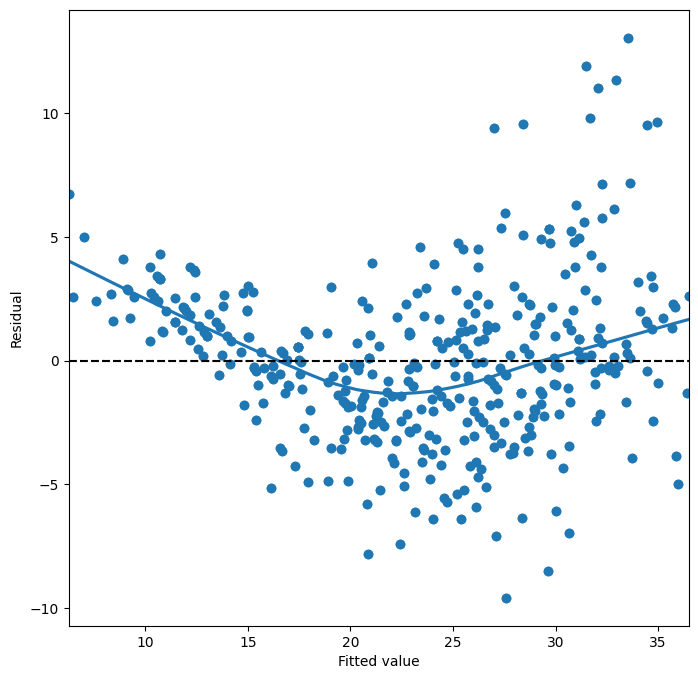

In [136]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
sns.residplot(data=Auto, x=results.fittedvalues, y='mpg', lowess=True)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

13

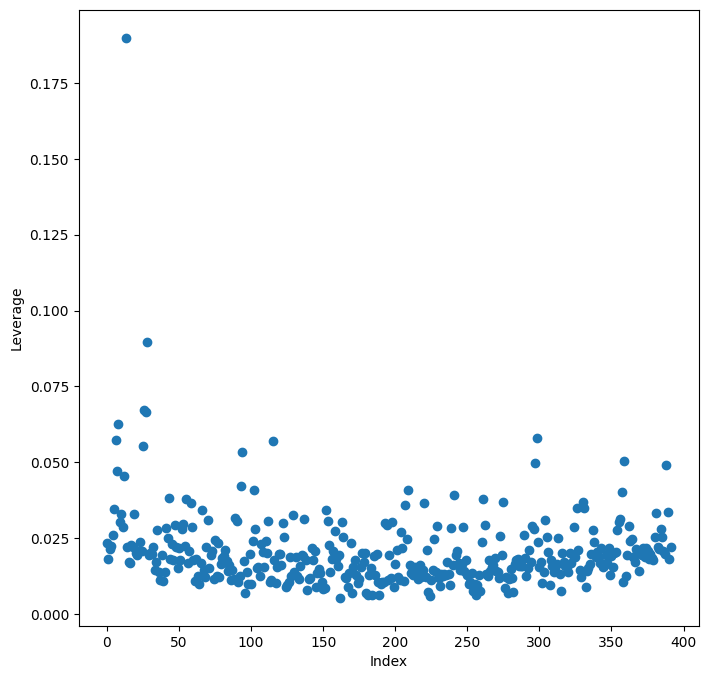

In [137]:
infl = results.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

Exercise 10

In [138]:
Carseats = load_data('Carseats')
print(Carseats.columns)
Carseats



Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


array([[<Axes: xlabel='Sales', ylabel='Sales'>,
        <Axes: xlabel='CompPrice', ylabel='Sales'>,
        <Axes: xlabel='Income', ylabel='Sales'>,
        <Axes: xlabel='Advertising', ylabel='Sales'>,
        <Axes: xlabel='Population', ylabel='Sales'>,
        <Axes: xlabel='Price', ylabel='Sales'>,
        <Axes: xlabel='Age', ylabel='Sales'>,
        <Axes: xlabel='Education', ylabel='Sales'>],
       [<Axes: xlabel='Sales', ylabel='CompPrice'>,
        <Axes: xlabel='CompPrice', ylabel='CompPrice'>,
        <Axes: xlabel='Income', ylabel='CompPrice'>,
        <Axes: xlabel='Advertising', ylabel='CompPrice'>,
        <Axes: xlabel='Population', ylabel='CompPrice'>,
        <Axes: xlabel='Price', ylabel='CompPrice'>,
        <Axes: xlabel='Age', ylabel='CompPrice'>,
        <Axes: xlabel='Education', ylabel='CompPrice'>],
       [<Axes: xlabel='Sales', ylabel='Income'>,
        <Axes: xlabel='CompPrice', ylabel='Income'>,
        <Axes: xlabel='Income', ylabel='Income'>,
        <A

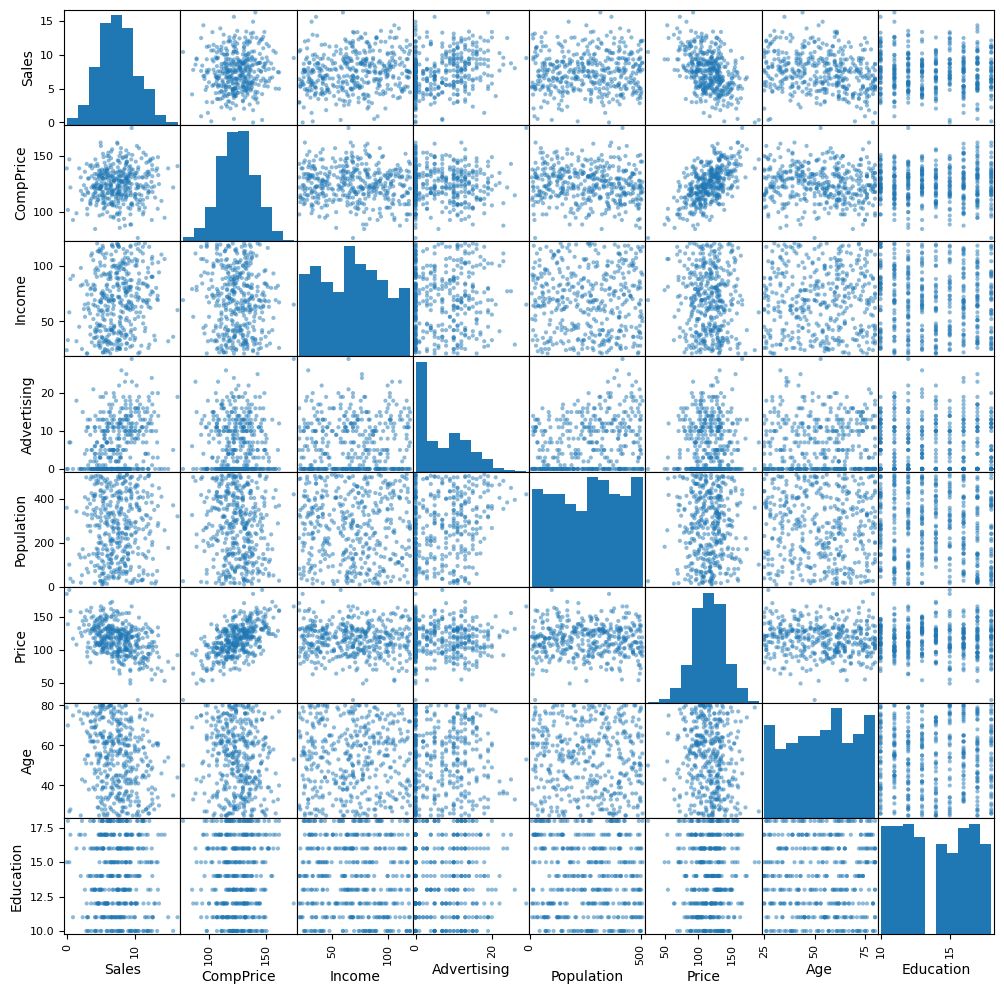

In [139]:
pd.plotting.scatter_matrix(Carseats, figsize=(12,12))

(a) Fit a multiple regression model to predict Sales using Price,
Urban, and US.

In [140]:
y = Carseats['Sales']
X = MS(['Price', 'Urban', 'US']).fit_transform(Carseats)
print(X)
model2 = sm.OLS(y,X)
results2 = model2.fit()
print(results2.summary())
summarize(results2)

     intercept  Price  Urban[Yes]  US[Yes]
0          1.0    120         1.0      1.0
1          1.0     83         1.0      1.0
2          1.0     80         1.0      1.0
3          1.0     97         1.0      1.0
4          1.0    128         1.0      0.0
..         ...    ...         ...      ...
395        1.0    128         1.0      1.0
396        1.0    120         0.0      1.0
397        1.0    159         1.0      1.0
398        1.0     95         1.0      1.0
399        1.0    120         1.0      1.0

[400 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           2.39e-23
Time:                        09:02:54   Log-Likelihood:          

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


(b) Provide an interpretation of each coefcient in the model. Be
carefule some of the variables in the model are qualitative!


Price is -0.0545 which means if everything else is constant, a 1 unit increase in price will lead to a drop of -0.0545 sales.
Urban is also negative, but its pValue is large which means it is not a useful for estimating the sales.
US is 1.2006 and its pvalue is low, which means it is useful for predicting sales and if everything else held constant and it US was a yes (one) then that means that sales will increase by 1.2006.


(c) Write out the model in equation form, being careful to handle
the qualitative variables properly

Sales = 13.0435 - 0.545(Price) - 0.0219(Urban) + 1.2006(US)

(d) For which of the predictors can you reject the null hypothesis
H0 : βj = 0?

Price and US, Urban pValue is too high

(e) On the basis of your response to the previous question, ft a
smaller model that only uses the predictors for which there is
evidence of association with the outcome.


In [141]:
X = MS(['Price', 'US']).fit_transform(Carseats)
print(X)
model3 = sm.OLS(y,X)
results3 = model3.fit()
print(results2.summary())
summarize(results2)

     intercept  Price  US[Yes]
0          1.0    120      1.0
1          1.0     83      1.0
2          1.0     80      1.0
3          1.0     97      1.0
4          1.0    128      0.0
..         ...    ...      ...
395        1.0    128      1.0
396        1.0    120      1.0
397        1.0    159      1.0
398        1.0     95      1.0
399        1.0    120      1.0

[400 rows x 3 columns]
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           2.39e-23
Time:                        09:02:54   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:       

,coef,std err,t,P>|t|
intercept,13.0435,0.651,20.036,0.000
Price,-0.0545,0.005,-10.389,0.000
Urban[Yes],-0.0219,0.272,-0.081,0.936
US[Yes],1.2006,0.259,4.635,0.000


(f) How well do the models in (a) and (e) ft the data?

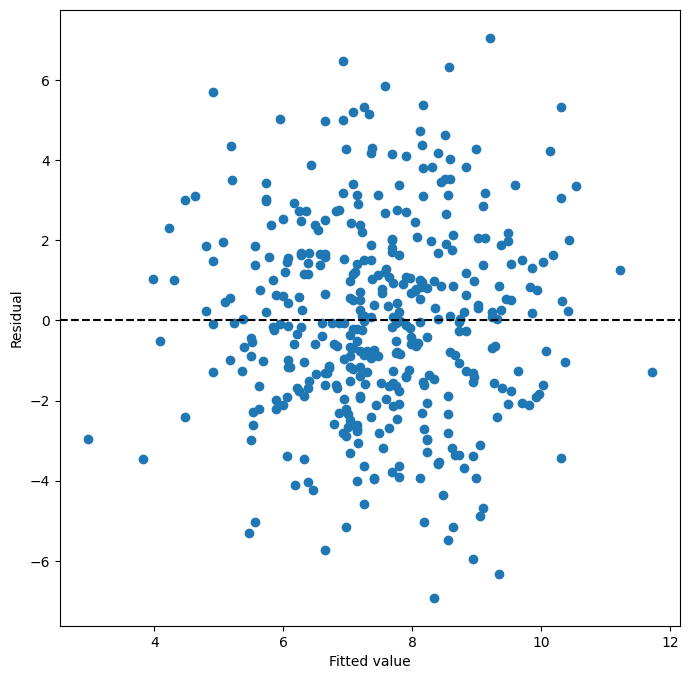

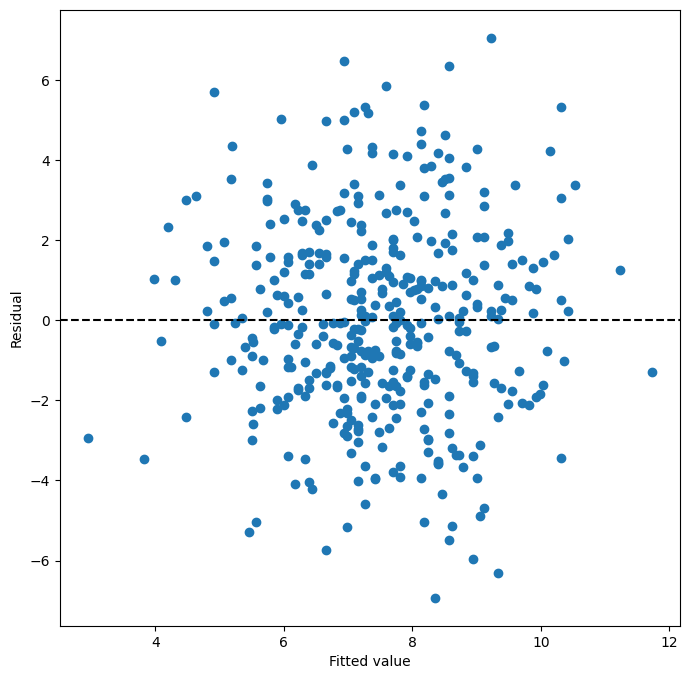

In [142]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results2.fittedvalues, results2.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

ax = subplots(figsize=(8,8))[1]
ax.scatter(results3.fittedvalues, results3.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

There is no pattern in the residual for any of the models, meaning that none of the models fits the data well at any points as there is never a decrease in the pattern of decrease of the residuals.

(g) Using the model from (e), obtain 95 % confdence intervals for
the coefcient(s).

In [143]:
results3.conf_int(alpha=0.05)

,0,1
intercept,11.79032,14.271265
Price,-0.06476,-0.044195
US[Yes],0.69152,1.707766


(h) Is there evidence of outliers or high leverage observations in the
model from (e)?

42

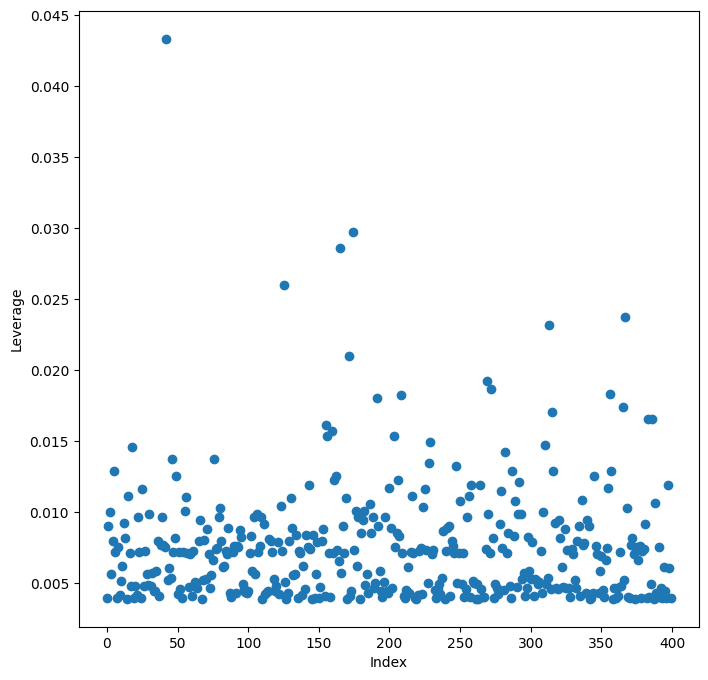

In [144]:
infl = results3.get_influence()
ax = subplots(figsize=(8,8))[1]
ax.scatter(np.arange(X.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(infl.hat_matrix_diag)

In [145]:
vals = [VIF(X, i)
        for i in range(1, X.shape[1])]
vif = pd.DataFrame({'vif':vals},
                   index=X.columns[1:])
vif

,vif
Price,1.003359
US[Yes],1.003359


Exercise 11

In [146]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

print(x)
y

[ 3.45584192e-01  8.21618144e-01  3.30437076e-01 -1.30315723e+00
  9.05355867e-01  4.46374572e-01 -5.36953235e-01  5.81118104e-01
  3.64572396e-01  2.94132497e-01  2.84222413e-02  5.46712987e-01
 -7.36454087e-01 -1.62909948e-01 -4.82119313e-01  5.98846213e-01
  3.97221075e-02 -2.92456751e-01 -7.81908462e-01 -2.57192241e-01
  8.14218052e-03 -2.75602905e-01  1.29406381e+00  1.00672432e+00
 -2.71116248e+00 -1.88901325e+00 -1.74772092e-01 -4.22190412e-01
  2.13642997e-01  2.17321931e-01  2.11783876e+00 -1.11202076e+00
 -3.77605007e-01  2.04277161e+00  6.46702996e-01  6.63063372e-01
 -5.14006372e-01 -1.64807517e+00  1.67464744e-01  1.09014088e-01
 -1.22735205e+00 -6.83226662e-01 -7.20436797e-02 -9.44751623e-01
 -9.82699679e-02  9.54830275e-02  3.55862371e-02 -5.06291658e-01
  5.93748072e-01  8.91166954e-01  3.20848305e-01 -8.18230227e-01
  7.31652284e-01 -5.01440018e-01  8.79160618e-01 -1.07178742e+00
  9.14467203e-01 -2.00634546e-02 -1.24874889e+00 -3.13899472e-01
  5.41022788e-02  2.72791

array([ 0.03988737,  2.50568108,  0.53528207, -1.93716122,  3.02955534,
        1.27567873, -1.94962761, -0.35208242,  2.48252891,  0.4769728 ,
       -0.63172047,  1.23768306, -1.6643195 ,  0.52632237, -0.93031044,
        1.21144201, -0.63513551, -0.1153454 , -2.59768365,  0.15150496,
        1.54022187, -2.07589185,  0.1218984 ,  2.63032739, -2.87442714,
       -4.77895134, -1.60023994, -0.25541189, -0.4134356 , -0.07138162,
        3.88756004, -1.69203944, -1.16051238,  4.36342606,  1.11687273,
        0.48145564, -1.347839  , -4.24655001,  0.34144447, -0.90583805,
       -3.54759848,  0.09050849, -0.19727158, -1.94340527,  0.31499648,
       -0.22989095, -0.15736289, -0.58743458,  1.46991199,  0.62303718,
        1.47503921, -2.2268954 ,  0.40722562, -1.90335511,  1.36777589,
       -0.51627458,  0.6533985 ,  0.11994898, -4.63532214, -0.62936588,
        1.00777098,  0.30891936, -2.59373117, -1.98323503,  1.09932082,
       -0.26984166,  2.44348508,  1.72820652, -3.88998483,  0.38

(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefcient estimate βˆ, the standard error of
this coefcient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these
results. (You can perform regression without an intercept using
the keywords argument intercept=False to ModelSpec().)

In [147]:
vals = pd.DataFrame({'input':x, 'output':y})
print(vals)
X = MS(['output'], intercept=False).fit_transform(vals)
print(X)
model = sm.OLS(x,X)
results = model.fit()
print(results.summary())
summarize(results)

       input    output
0   0.345584  0.039887
1   0.821618  2.505681
2   0.330437  0.535282
3  -1.303157 -1.937161
4   0.905356  3.029555
..       ...       ...
95 -2.250854 -6.119176
96 -0.138655  0.832327
97  0.033000  0.234106
98 -1.425349 -2.302292
99  0.332814 -0.399498

[100 rows x 2 columns]
      output
0   0.039887
1   2.505681
2   0.535282
3  -1.937161
4   3.029555
..       ...
95 -6.119176
96  0.832327
97  0.234106
98 -2.302292
99 -0.399498

[100 rows x 1 columns]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 09 Jul 2024   Prob (F-statistic):                    6.23e-31
Time:                        09:02:55   Log-Likelihood:                         

,coef,std err,t,P>|t|
output,0.3757,0.022,16.898,0.0


The coeficcient of B is 0.3757 and the pValue associated with it is 0 so there is a relationship from y to x

(b) Now perform a simple linear regression of x onto y without an
intercept, and report the coefcient estimate, its standard error,
and the corresponding t-statistic and p-values associated with
the null hypothesis H0 : β = 0. Comment on these results.

In [148]:
X = MS(['input'], intercept=False).fit_transform(vals)
model2 = sm.OLS(y,X)
results2 = model.fit()
print(results2.summary())
summarize(results2)

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Tue, 09 Jul 2024   Prob (F-statistic):                    6.23e-31
Time:                        09:02:55   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

,coef,std err,t,P>|t|
output,0.3757,0.022,16.898,0.0


The pValues is 0 which means there is a relationship between the input and output and we can reject the null hypothesis that B is 0.


(c) What is the relationship between the results obtained in (a) and
(b)?


The relationship is the same between x and y that is is for y and x, its exactly linear.


Exercise 12

a) when the variance is the same

(b) Generate an example in Python with n = 100 observations in
which the coefcient estimate for the regression of X onto Y
is diferent from the coefcient estimate for the regression of Y
onto X.


In [149]:
rng = np.random.default_rng(1)
x = rng.normal(0,1,size=100)
y = rng.normal(0,4,size=100)

vals = pd.DataFrame({'x':x, 'y':y})


X = MS(['x'], intercept=False).fit_transform(vals)
model = sm.OLS(y,X)
results = model.fit()
summarize(results)


,coef,std err,t,P>|t|
x,-0.095,0.468,-0.203,0.839


In [150]:

Y = MS(['y'], intercept=False).fit_transform(vals)
model = sm.OLS(x,Y)
results = model.fit()
summarize(results)


,coef,std err,t,P>|t|
y,-0.0044,0.022,-0.203,0.839


(c) Generate an example in Python with n = 100 observations in
which the coefcient estimate for the regression of X onto Y is
the same as the coefcient estimate for the regression of Y onto
X

In [151]:
x = rng.normal(0,1,size=100)
y = x[::-1]

vals = pd.DataFrame({'x':x, 'y':y})

X = MS(['x'], intercept=False).fit_transform(vals)
model = sm.OLS(y,X)
results = model.fit()
summarize(results)


,coef,std err,t,P>|t|
x,-0.0521,0.1,-0.519,0.605


In [152]:

Y = MS(['y'], intercept=False).fit_transform(vals)
model = sm.OLS(x,Y)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
y,-0.0521,0.1,-0.519,0.605


Exercise 13

(a) Using the normal() method of your random number generator,
create a vector, x, containing 100 observations drawn from a
N(0, 1) distribution. This represents a feature, X.

(b) Using the normal() method, create a vector, eps, containing 100
observations drawn from a N(0, 0.25) distribution—a normal
distribution with mean zero and variance 0.25.

In [160]:
rng = np.random.default_rng(1)
x = rng.normal(0,1,size=100)
eps = rng.normal(0,0.7,size=100)

(c) Using x and eps, generate a vector y according to the model
Y = −1 + 0.5X + ϵ. (3.39)
What is the length of the vector y? What are the values of β0
and β1 in this linear model?

In [178]:
y = -1 + 0.5*x + eps
y.shape

array([-0.99002816, -0.37357973, -0.86617948, -1.48429031, -0.24261117,
       -0.68108032, -1.4874069 , -1.08802061, -0.37936777, -0.8807568 ,
       -1.15793012, -0.69057923, -1.41607988, -0.86841941, -1.23257761,
       -0.6971395 , -1.15878388, -1.02883635, -1.64942091, -0.96212376,
       -0.61494453, -1.51897296, -0.9695254 , -0.34241815, -1.71860679,
       -2.19473784, -1.40005999, -1.06385297, -1.1033589 , -1.01784541,
       -0.02810999, -1.42300986, -1.29012809,  0.09085651, -0.72078182,
       -0.87963609, -1.33695975, -2.0616375 , -0.91463888, -1.22645951,
       -1.88689962, -0.97737288, -1.04931789, -1.48585132, -0.92125088,
       -1.05747274, -1.03934072, -1.14685865, -0.632522  , -0.8442407 ,
       -0.6312402 , -1.55672385, -0.8981936 , -1.47583878, -0.65805603,
       -1.12906864, -0.83665037, -0.97001275, -2.15883053, -1.15734147,
       -0.74805726, -0.92277016, -1.64843279, -1.49580876, -0.7251698 ,
       -1.06746042, -0.38912873, -0.56794837, -1.97249621, -0.90

The length is 100 and -1 is β0 and  0.5 is β1

(d) Create a scatterplot displaying the relationship between x and
y. Comment on what you observe.

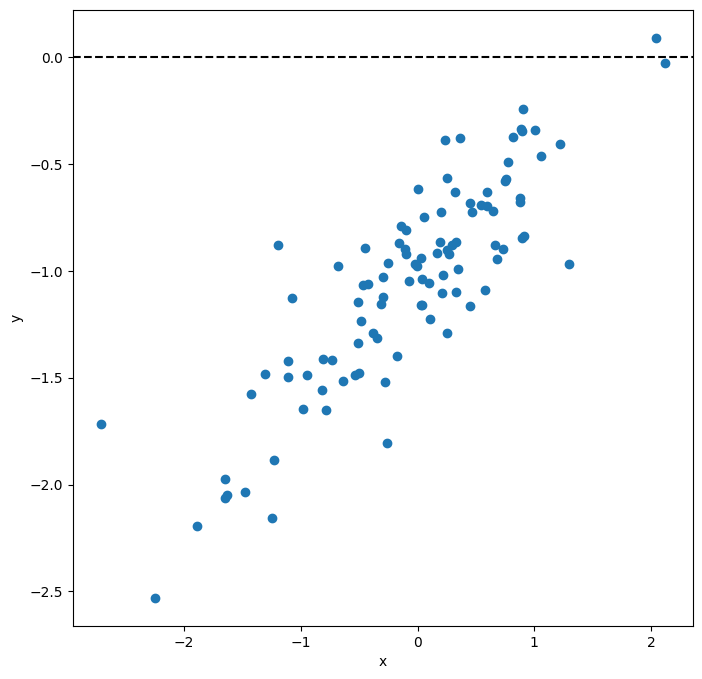

In [168]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axhline(0, c='k', ls='--')

x is positively correlated with y

(e) Fit a least squares linear model to predict y using x. Comment
on the model obtained. How do βˆ
0 and βˆ
1 compare to β0 and
β1?

In [187]:
vals = pd.DataFrame({'x':x,'y':y})

X = MS(['x']).fit_transform(vals)
model = sm.OLS(y,X)
results = model.fit()
summarize(results)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     280.0
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           1.74e-30
Time:                        09:48:39   Log-Likelihood:                -2.4306
No. Observations:                 100   AIC:                             8.861
Df Residuals:                      98   BIC:                             14.07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0190      0.025    -40.537      0.000      -1.069      -0.969
x              0.4921      0.029     16.734      0.000       0.434       0.551
==============================================================================
Omnibus:                        1.277   Durbin-Watson:                   2.198
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.759
Skew:                           0.114   Prob(JB):                        0.684
Kurtosis:                       3.361   Cond. No.                         1.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There are very close to b0 and b1

(f) Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a diferent
color. Use the legend() method of the axes to create an appropriate legend.

C:\Users\William\AppData\Local\Temp\ipykernel_21524\985536795.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_0 = results.params[0]
C:\Users\William\AppData\Local\Temp\ipykernel_21524\985536795.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_1 = results.params[1]


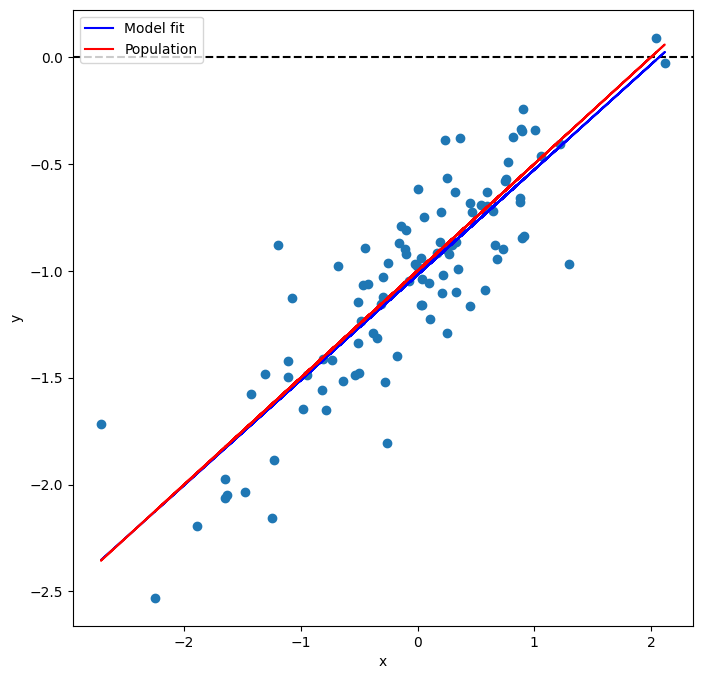

In [180]:
beta_0 = results.params[0]
beta_1 = results.params[1]

y_pred = beta_0 + beta_1*x
y_test = -1 + 0.5*x

ax = subplots(figsize=(8,8))[1]
ax.scatter(x, y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.axhline(0, c='k', ls='--')
ax.plot(x,y_pred, 'blue', label="Model fit")
ax.plot(x, y_test, 'red', label="Population")
ax.legend(loc="upper left")








(g) Now ft a polynomial regression model that predicts y using x
and x
2
. Is there evidence that the quadratic term improves the
model ft? Explain your answer.


In [182]:
X1 = MS([poly('x', degree=2)]).fit_transform(vals)
model1=sm.OLS(y,X1)
result1=model1.fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     138.6
Date:                Tue, 09 Jul 2024   Prob (F-statistic):           3.66e-29
Time:                        09:48:02   Log-Likelihood:                -2.4293
No. Observations:                 100   AIC:                             10.86
Df Residuals:                      97   BIC:                             18.67
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
intercept               -1.0552      0.025    -41.920      0.000      -1.105      -1.005
poly(x, degree=2)[0]     4.1909      0.252     16.649      0.000       3.691       4.691
poly(x, degree=2)[1]    -0.0131      0.252     -0.052      0.959      -0.513       0.487
==============================================================================
Omnibus:                        1.338   Durbin-Watson:                   2.197
Prob(Omnibus):                  0.512   Jarque-Bera (JB):                0.814
Skew:                           0.119   Prob(JB):                        0.666
Kurtosis:                       3.372   Cond. No.                         10.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

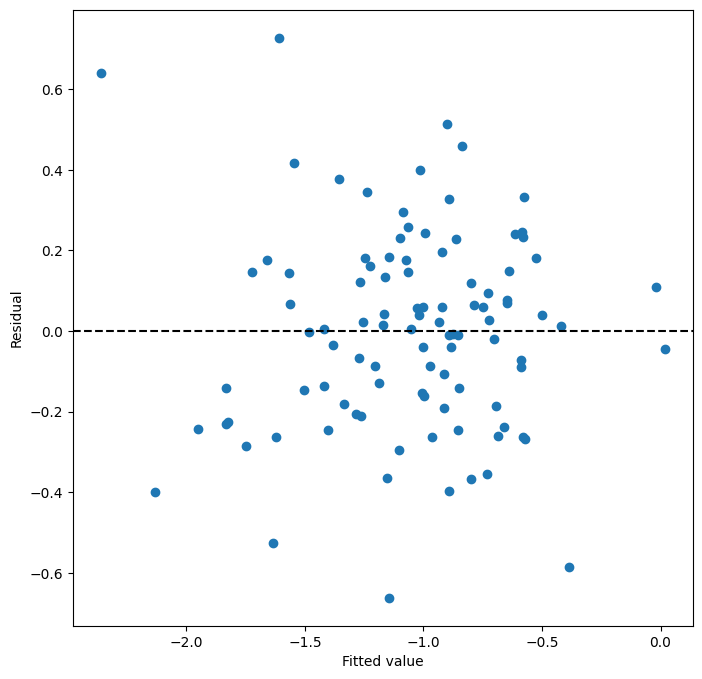

In [188]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(result1.fittedvalues, result1.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')

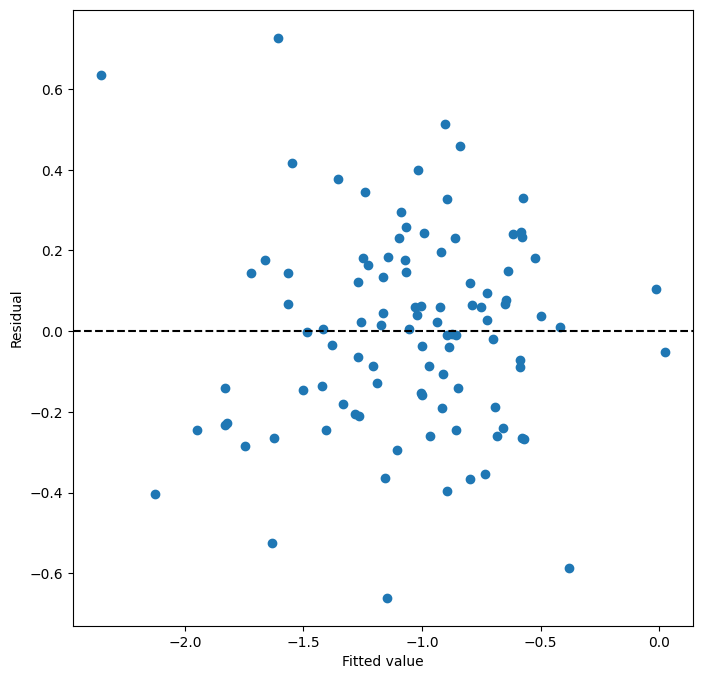

In [189]:
ax = subplots(figsize=(8,8))[1]
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--')